In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

In [ ]:
# inporting the dataset
df=pd.read_csv("credit_risk_dataset.csv")

In [ ]:
# printing the first 5 roles
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# checking the shape of the dataset
df.shape

(32581, 12)

In [ ]:
# checking the statistical details of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [ ]:
# checking for missing values
df.isna().sum()


,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
df.loan_grade.value_counts()

,count
loan_grade,
A,10777
B,10451
C,6458
D,3626
E,964
F,241
G,64


A' - Low credit risk 'G'- High credit risk

Function to fill null values for loan interest rate based on grade mean

In [ ]:
def grade_interest(col):
  grade=col[0]
  interest_rate=col[1]
  if pd.isnull(interest_rate):
    if grade=='A':
      return 7.33
    elif grade=='B':
      return 10.99
    elif grade=='C':
      return 13.46
    elif grade=='D':
      return 15.36
    elif grade== 'E':
      return 17.01
    elif grade=='F':
      return 18.61
    elif grade=='G':
      return 20.25
  else:
    return interest_rate

In [ ]:
df['loan_int_rate']=df[['loan_grade','loan_int_rate']].apply(grade_interest,axis=1)

<ipython-input-8-a132ba36dcf5>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grade=col[0]
<ipython-input-8-a132ba36dcf5>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  interest_rate=col[1]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
# to get the rows where 'person_emp_length' has missing values in "person_age" and 'person_emp_length'
df.loc[df['person_emp_length'].isnull(),['person_age','person_emp_length']]

,person_age,person_emp_length
105,22,NaN
222,24,NaN
379,24,NaN
407,25,NaN
408,22,NaN
...,...,...
32285,38,NaN
32328,51,NaN
32360,70,NaN
32453,56,NaN


In [ ]:
df.dropna(inplace=True) # to drop the missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31686 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  31686 non-null  int64  
 1   person_income               31686 non-null  int64  
 2   person_home_ownership       31686 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 31686 non-null  object 
 5   loan_grade                  31686 non-null  object 
 6   loan_amnt                   31686 non-null  int64  
 7   loan_int_rate               31686 non-null  float64
 8   loan_status                 31686 non-null  int64  
 9   loan_percent_income         31686 non-null  float64
 10  cb_person_default_on_file   31686 non-null  object 
 11  cb_person_cred_hist_length  31686 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.1+ MB


In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
df.duplicated().sum()# to check for duplicate values

157

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 31529, dtype: bool>

Text(0.5, 1.0, 'Person age Vs Person employment length')

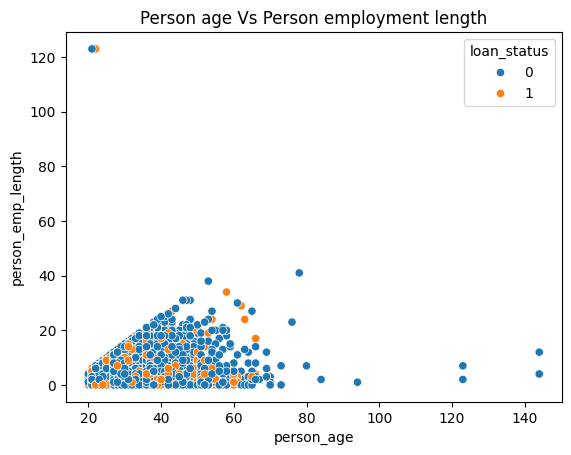

In [ ]:
sns.scatterplot(y='person_emp_length', x='person_age',hue='loan_status',data=df) # to check for the person employment length with regards to their age
plt.title('Person age Vs Person employment length')

In [ ]:
df.drop(df[df['person_age'] > 120].index, inplace=True)# to drop the ages that are above 120 years

In [ ]:
df.drop(df[df['person_emp_length'] >41].index, inplace=True)# to drop person employment length that is above 41

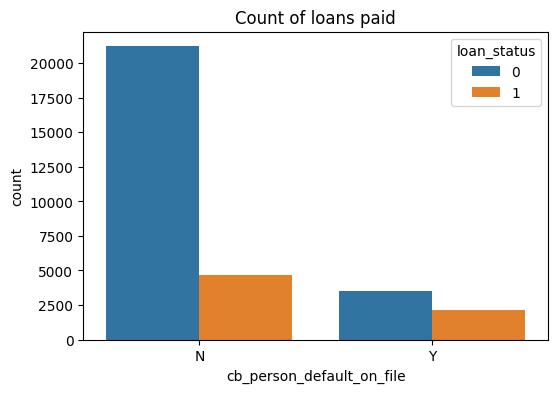

In [ ]:
fig,ax = plt.subplots(figsize=(6,4))
sns.countplot(x='cb_person_default_on_file',hue='loan_status' ,data=df)
plt.title("Count of loans paid")
plt.show()

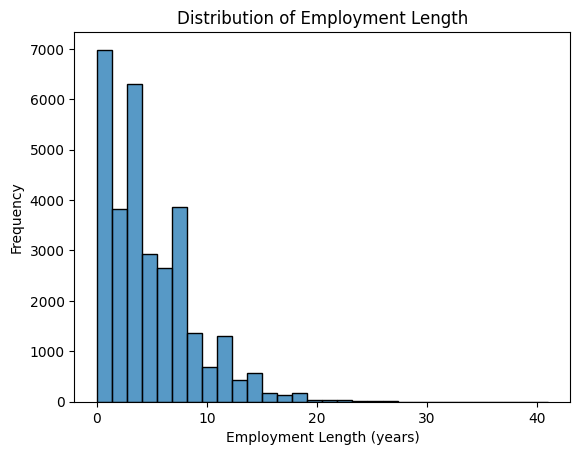

In [ ]:
sns.histplot(data=df, x='person_emp_length', bins=30)
plt.xlabel('Employment Length (years)')
plt.ylabel('Frequency')
plt.title('Distribution of Employment Length')
plt.show()

Text(0.5, 1.0, 'Count of Loan grade')

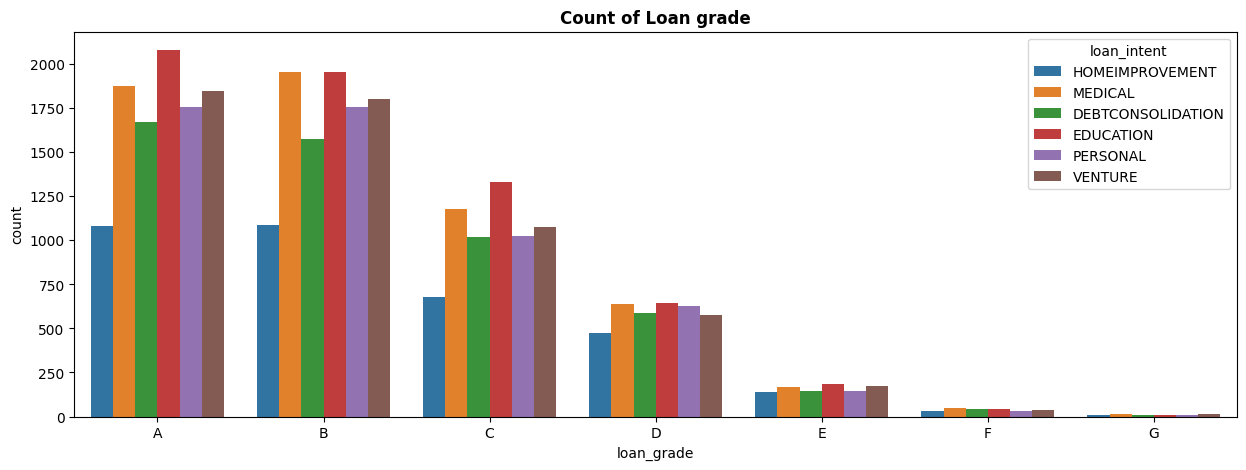

In [ ]:
# to get the level of  each loan intent for each loan grade
plt.figure(figsize=(15,5))
sns.countplot(data=df.sort_values(by='loan_grade'),x=df.sort_values(by='loan_grade')['loan_grade'],hue='loan_intent')
plt.title('Count of Loan grade', weight='bold')

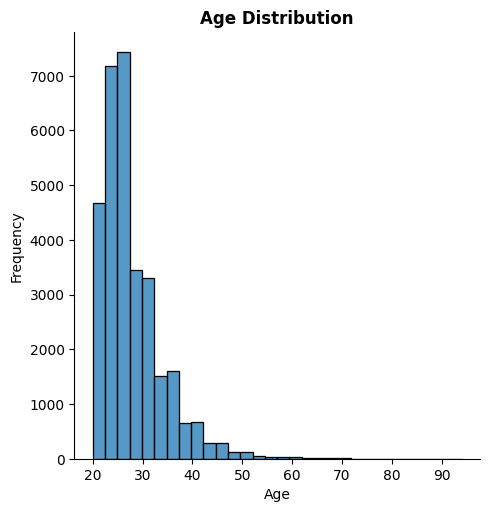

In [ ]:
# to check the distribution of age in the dataset
sns.displot(df['person_age'], bins=30)
plt.title('Age Distribution', weight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

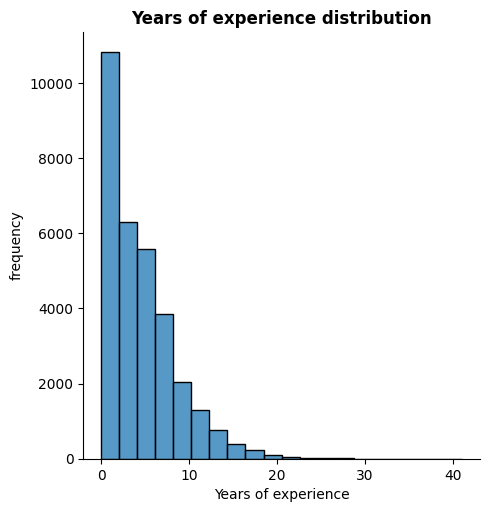

In [ ]:
sns.displot(df['person_emp_length'],bins=20)
plt.title('Years of experience distribution',weight='bold')
plt.xlabel('Years of experience')
plt.ylabel('frequency')
plt.show()

In [ ]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [ ]:
correlation_df = df[['loan_percent_income', 'loan_status']]

In [ ]:
correlation = correlation_df['loan_percent_income'].corr(correlation_df['loan_status'])
print(f"correlation between debt to income ratio and default ratio: {correlation}")

correlation between debt to income ratio and default ratio: 0.3800687605097416


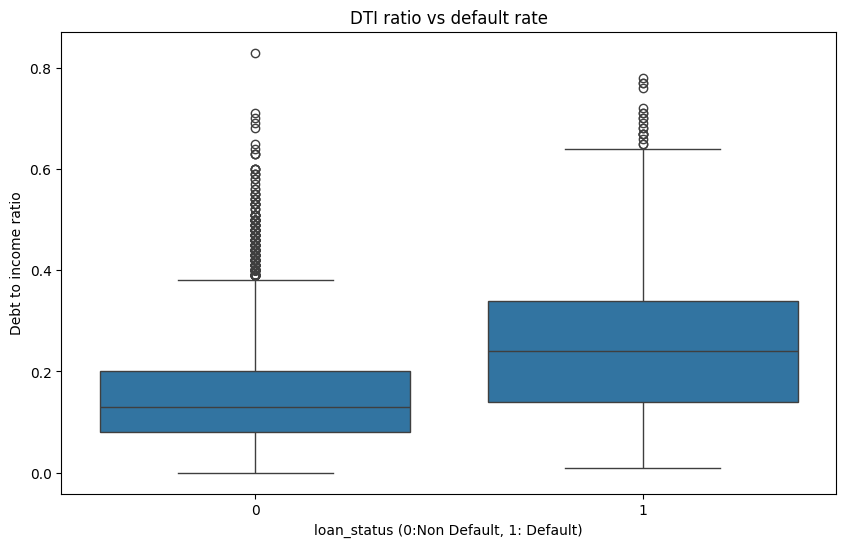

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x ='loan_status', y = 'loan_percent_income',data = df)
plt.title("DTI ratio vs default rate")
plt.xlabel("loan_status (0:Non Default, 1: Default)")
plt.ylabel("Debt to income ratio")
plt.show()

In [ ]:
default_cases = df[df['loan_status'] == 1]

Ranking of loan intents by Default Count:
         loan_intent  Default Count  Average Loan Amount
3            MEDICAL           1561         11386.675208
0  DEBTCONSOLIDATION           1435         11294.442509
1          EDUCATION           1061         11118.850141
4           PERSONAL           1043         10643.024928
2    HOMEIMPROVEMENT            896         10048.800223
5            VENTURE            811         11281.411837

Ranking of loan intents by Average Loan Amount:
         loan_intent  Default Count  Average Loan Amount
3            MEDICAL           1561         11386.675208
0  DEBTCONSOLIDATION           1435         11294.442509
5            VENTURE            811         11281.411837
1          EDUCATION           1061         11118.850141
4           PERSONAL           1043         10643.024928
2    HOMEIMPROVEMENT            896         10048.800223


<ipython-input-31-d6305ff07e71>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Default Count", y="loan_intent", data=loan_intent_default_summary, palette="viridis", ax=ax1)


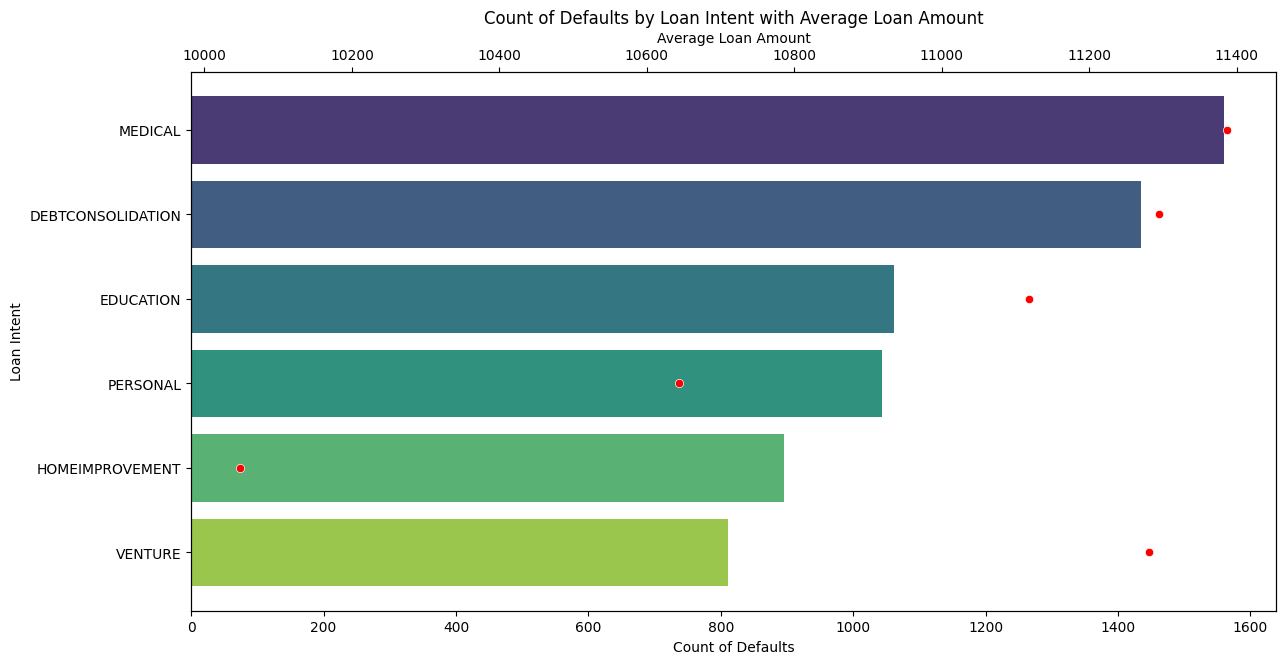

In [ ]:
# Group by loan intent and count defaults
loan_intent_default_count = default_cases.groupby('loan_intent')['loan_status'].count().reset_index()
loan_intent_default_count.columns = ['loan_intent', 'Default Count']
# Group by loan intent and calculate average loan amount
loan_intent_avg_loan_amount = default_cases.groupby('loan_intent')['loan_amnt'].mean().reset_index()
loan_intent_avg_loan_amount.columns = ['loan_intent', 'Average Loan Amount']

# Merge the two DataFrames on loan intent
loan_intent_default_summary = pd.merge(loan_intent_default_count, loan_intent_avg_loan_amount, on='loan_intent')

# Sort the DataFrame by Default Count in descending order
loan_intent_default_summary = loan_intent_default_summary.sort_values(by='Default Count', ascending=False)

# Display the ranking of loan intents by Default Count
print('Ranking of loan intents by Default Count:')
print(loan_intent_default_summary)

# Sort by Average Loan Amount in descending order for display
loan_intent_avg_loan_amount_sorted = loan_intent_default_summary.sort_values(by='Average Loan Amount', ascending=False)
print("\nRanking of loan intents by Average Loan Amount:")
print(loan_intent_avg_loan_amount_sorted)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar plot for Default Count
sns.barplot(x="Default Count", y="loan_intent", data=loan_intent_default_summary, palette="viridis", ax=ax1)
ax1.set_title("Count of Defaults by Loan Intent with Average Loan Amount")
ax1.set_xlabel('Count of Defaults')
ax1.set_ylabel('Loan Intent')

# Scatter plot for Average Loan Amount
ax2 = ax1.twiny()
sns.scatterplot(x="Average Loan Amount", y="loan_intent", data=loan_intent_default_summary, color="red", ax=ax2)
ax2.set_xlabel('Average Loan Amount')

plt.show()

In [ ]:
c_data = df.select_dtypes(include=['object']).columns  # checking the categorical and numeric columns
n_data = df.select_dtypes(include=['int','float']).columns
print("the number of categorical columns are:",len(c_data))
print("the number of numerical columns are:",len(n_data))

the number of categorical columns are: 4
the number of numerical columns are: 8


In [ ]:
std_sc = StandardScaler() # to scale the numerical data

In [ ]:
columns_to_exclude = ['loan_status','person_home_ownership','cb_person_default_on_file','loan_grade','loan_intent']
columns_to_standardize = df.columns.difference(columns_to_exclude)# to exclude the categorical data

In [ ]:
df[columns_to_standardize] = std_sc.fit_transform(df[columns_to_standardize])

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,-1.084249,-1.078678,OWN,0.053786,EDUCATION,B,-1.367672,0.029969,0,-0.655333,N,-0.939103
2,-0.441019,-1.078678,MORTGAGE,-0.936980,MEDICAL,C,-0.657297,0.568881,1,3.766361,N,-0.693013
3,-0.762634,-0.018989,RENT,-0.193905,MEDICAL,C,3.999602,1.304043,1,3.390047,N,-0.939103
4,-0.601827,-0.229410,RENT,0.796861,MEDICAL,C,3.999602,1.004994,1,3.578204,Y,-0.446923
5,-1.084249,-1.072991,OWN,-0.689289,VENTURE,A,-1.130880,-1.216069,1,0.755846,N,-0.939103
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,4.704822,-0.255950,MORTGAGE,-0.936980,PERSONAL,C,-0.609939,0.659218,0,-0.561254,N,5.951412
32577,4.222399,1.014161,MORTGAGE,-0.193905,PERSONAL,A,1.256767,-1.107040,0,-0.184940,N,3.244424
32578,5.991282,0.180058,RENT,-0.441597,HOMEIMPROVEMENT,B,3.999602,-0.016757,1,2.731497,N,5.459233
32579,4.544014,1.582867,MORTGAGE,0.053786,PERSONAL,B,0.842382,0.135883,0,-0.655333,N,4.967053


In [ ]:
df=pd.get_dummies(df,columns=['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'],dtype=int)

In [ ]:
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,-1.084249,-1.078678,0.053786,-1.367672,0.029969,0,-0.655333,-0.939103,0,0,...,0,0,1,0,0,0,0,0,1,0
2,-0.441019,-1.078678,-0.936980,-0.657297,0.568881,1,3.766361,-0.693013,1,0,...,0,0,0,1,0,0,0,0,1,0
3,-0.762634,-0.018989,-0.193905,3.999602,1.304043,1,3.390047,-0.939103,0,0,...,0,0,0,1,0,0,0,0,1,0
4,-0.601827,-0.229410,0.796861,3.999602,1.004994,1,3.578204,-0.446923,0,0,...,0,0,0,1,0,0,0,0,0,1
5,-1.084249,-1.072991,-0.689289,-1.130880,-1.216069,1,0.755846,-0.939103,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,4.704822,-0.255950,-0.936980,-0.609939,0.659218,0,-0.561254,5.951412,1,0,...,0,0,0,1,0,0,0,0,1,0
32577,4.222399,1.014161,-0.193905,1.256767,-1.107040,0,-0.184940,3.244424,1,0,...,0,1,0,0,0,0,0,0,1,0
32578,5.991282,0.180058,-0.441597,3.999602,-0.016757,1,2.731497,5.459233,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,4.544014,1.582867,0.053786,0.842382,0.135883,0,-0.655333,4.967053,1,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
X =df[['person_age','person_income','loan_amnt','person_home_ownership_MORTGAGE',
         'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT',
         'person_emp_length','loan_intent_DEBTCONSOLIDATION','loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_int_rate',
        'cb_person_default_on_file_N', 'cb_person_default_on_file_Y','loan_percent_income']]# separating the data and labels
y = df['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(22065, 18)

In [ ]:
X_test.shape

(9457, 18)

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) #to resampled

In [ ]:
logistic_classifier = LogisticRegression(random_state = 42)
logistic_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = logistic_classifier.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

In [ ]:
# Categories for one-hot encoding
Categories = {
    "person_home_ownership": ['RENT', 'OWN', 'MORTGAGE', 'OTHER'],
    "loan_intent": ['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'],
    "cb_person_default_on_file": ['Y', 'N']
}

# Define all expected columns
all_columns = [ 'person_age', 'person_income', 'loan_amnt', 'person_home_ownership_RENT', 'person_home_ownership_OWN', 'person_home_ownership_MORTGAGE',
               'person_home_ownership_OTHER', 'person_emp_length', 'loan_intent_PERSONAL', 'loan_intent_EDUCATION', 'loan_intent_MEDICAL', 'loan_intent_VENTURE',
               'loan_intent_HOMEIMPROVEMENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_int_rate', 'cb_person_default_on_file_Y', 'cb_person_default_on_file_N','loan_percent_income']

def predict_loan_default():
    print("\nEnter applicant details for credit risk assessment:")
    age = float(input("Enter applicant age: "))
    income = float(input("Enter applicant income: "))
    loan_amnt = float(input("Enter Loan amount: "))
    home_ownership = input("Home ownership (RENT/MORTGAGE/OWN/OTHER): ").upper()
    emp_length = float(input("Enter applicant years of employment: "))
    loan_intent = input("Loan intent (PERSONAL/EDUCATION/MEDICAL/VENTURE/HOMEIMPROVEMENT/DEBTCONSOLIDATION): ").upper()
    loan_int_rate = float(input("Enter Loan interest rate: "))
    loan_percent_income = loan_amnt / income
    default_history = input("Has the applicant defaulted before (Y/N): ").upper()

    # Initialize input_data with numerical features
    input_data = {
        "person_age": [age],
        "person_income": [income],
        "loan_amnt": [loan_amnt],
        "person_emp_length": [emp_length],
        "loan_int_rate": [loan_int_rate],
    }

    # Loop through each category and its corresponding values for one-hot encoding
    for category, values in zip(["person_home_ownership", "loan_intent", "cb_person_default_on_file"],
                                [home_ownership, loan_intent, default_history]):
        for val in Categories[category]:
            input_data[f"{category}_{val}"] = [1 if val == values else 0]

    # Convert input_data to a DataFrame
    input_data_df = pd.DataFrame(input_data)

    # Ensure all expected columns are present in the DataFrame
    for col in all_columns:
        if col not in input_data_df.columns:
            input_data_df[col] = 0

    # Reorder the DataFrame columns to match the model's expected input
    input_data_df = input_data_df[all_columns]

    # Make prediction using the logistic classifier
    prediction = logistic_classifier.predict(input_data_df)[0]

    # Output the result
    if prediction == 1:
        print("\nBased on the information provided, the applicant is predicted to be more likely to default on the loan.")
    else:
        print("\nBased on the information provided, the applicant is predicted to be more likely to not default on the loan.")

# Call the function to predict loan default
predict_loan_default()





Enter applicant details for credit risk assessment:


###Random Foerst

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random_classifier = RandomForestClassifier(random_state = 42)
Random_classifier.fit(X_train_resampled, y_train_resampled)
y_pred = Random_classifier.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


In [ ]:
#Defining a function that will fit a model, predict with and evaluate the model
def modeling_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)  #fits the model
    y_pred = model.predict(X_test)  #predicts the model

    confusion_matrix = pd.crosstab(y_test, y_pred,   # to generate confusion matrix
                               rownames=['Actual'],
                               colnames=['Predicted'],
                               margins = True)
    report = classification_report(y_test, y_pred) #to generate classification report
    print(f'{confusion_matrix} \n\n\n')
    print(report)

In [ ]:
modeling_evaluate(LogisticRegression(), X_train, y_train, X_test, y_test)